In [145]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sotodlib import core
import sotodlib.io.load as io_load

from moby2.analysis import socompat
socompat.register_loaders()

In [146]:
### This is used for .g3 files that are not part of an observation database
#fname = '/mnt/so1/shared/todsims/pipe-s0001/v4/datadump_LAT_MFF1/CES-Atacama-LAT-Tier1DEC-035..-045_RA+040..+050-0-0/MFF1_wafer_13_00000000.g3'
fname = '/global/project/projectdirs/sobs/todsims/pipe-s0001/v4/datadump_LAT_MFF1/CES-Atacama-LAT-Tier1DEC-035..-045_RA+040..+050-0-0/MFF1_wafer_13_00000000.g3'
tod = io_load.load_file(fname)

In [147]:
nersc_todsims = '/global/project/projectdirs/sobs/todsims/pipe-s0001/v4/context.yaml'
nersc_actpol = '/global/project/projectdirs/sobs/users/mhasse/actpol_demo/uranus_200327/metadata/context.yaml'

In [148]:
context = core.Context(nersc_todsims)

In [149]:
obs_list = context.obsdb.get()

print("There are {} observations currently in the database".format(len(obs_list)))

## Choose a random observation from the database
# x = np.random.randint(len(obs_list))
x = 138
my_obs = obs_list[x]

print('Observation:{}'.format(my_obs['obs_id']))

for k in my_obs:
    if k == 'obs_id':
        continue
    print('\t', k,':', my_obs[k])
    
type(my_obs)

There are 380 observations currently in the database
Observation:CES-Atacama-LAT-Tier1DEC-035..-045_RA+040..+050-21-0_MFF
	 timestamp : 1626614093.009091
	 drift : setting
	 az_min : -141.84857751648792
	 az_max : -128.821422483511
	 az_med : -135.4197826219584
	 el_min : 57.23000345371954
	 el_max : 60.22999654516515
	 el_med : 58.73
	 is_const_el : 0
	 is_const_az : 0
	 is_stare : 0


collections.OrderedDict

FInding Specific Observations

Loading Observations

In [150]:
## Detector Sets are how the observation files are saved at the moment. 
det_sets = context.obsfiledb.get_detsets( my_obs['obs_id'] )
print('The different detector sets are: \n', det_sets)


The different detector sets are: 
 ['MFF1_wafer_13', 'MFF1_wafer_14', 'MFF1_wafer_15', 'MFF1_wafer_16', 'MFF1_wafer_17', 'MFF1_wafer_18', 'MFF2_wafer_13', 'MFF2_wafer_14', 'MFF2_wafer_15', 'MFF2_wafer_16', 'MFF2_wafer_17', 'MFF2_wafer_18']


In [151]:
# Hongbo: det_sets is a set of detectors, each set has its own name
print(det_sets[0])
# to get  detectors of a det_set
dets = context.obsfiledb.get_dets(det_sets[0])
print('\nThe first 10 detectors of the first detector set are:\n',dets[:10])

### Just create a tod with 10 detectors
tod = context.get_obs(my_obs, dets=dets[:10])

MFF1_wafer_13

The first 10 detectors of the first detector set are:
 ['13_000_MFF1_A', '13_000_MFF1_B', '13_001_MFF1_A', '13_001_MFF1_B', '13_002_MFF1_A', '13_002_MFF1_B', '13_003_MFF1_A', '13_003_MFF1_B', '13_004_MFF1_A', '13_004_MFF1_B']


In [203]:
tod.signal

array([[9.572829 , 9.568788 , 9.571813 , ..., 9.779796 , 9.787439 ,
        9.779038 ],
       [9.57332  , 9.569824 , 9.577244 , ..., 9.79687  , 9.786265 ,
        9.791448 ],
       [9.570009 , 9.5763035, 9.560692 , ..., 9.785355 , 9.783514 ,
        9.77744  ],
       ...,
       [9.567498 , 9.564495 , 9.566481 , ..., 9.784607 , 9.782862 ,
        9.781806 ],
       [9.561976 , 9.567677 , 9.572031 , ..., 9.786881 , 9.784866 ,
        9.777049 ],
       [9.56716  , 9.569625 , 9.562336 , ..., 9.7845125, 9.779762 ,
        9.785077 ]], dtype=float32)

In [155]:
x

138

In [156]:
# Hongbo: what does a tod look like?
type(tod)

sotodlib.core.axisman.AxisManager

In [158]:
def print_tod_info(tod):
    if 'timestamps' in tod:
        print("""This observation is {} minutes long.
                 It has {} detectors loaded and {} samples""".format(round((tod.timestamps[-1]-tod.timestamps[0])/60.,2),
                                                                              tod.dets.count, tod.samps.count))

    print('This TOD AxisManager has {} Axes: '.format(len(tod._axes)))
    for k in tod._axes:
        print('\t{} with {} entries'.format(tod[k].name, tod[k].count ) )

    print('This TOD  AxisManager has fields : [axes]')
    for k in tod._fields:
        print('\t{} : {}'.format(k, tod._assignments[k]) )
        if type(tod._fields[k]) is core.AxisManager:
            for kk in tod[k]._fields:
                print('\t\t {} : {}'.format(kk, tod[k]._assignments[kk] ))
print_tod_info(tod)

This observation is 16.23 minutes long.
                 It has 10 detectors loaded and 214278 samples
This TOD AxisManager has 2 Axes: 
	dets with 10 entries
	samps with 214278 entries
This TOD  AxisManager has fields : [axes]
	signal : ['dets', 'samps']
	timestamps : ['samps']
	boresight : ['samps']
		 az : ['samps']
		 el : ['samps']
		 roll : ['samps']
	qboresight_azel : ['samps', None]
	qboresight_radec : ['samps', None]
	site : ['samps']
		 position : ['samps', None]
		 velocity : ['samps', None]
	flags : ['dets', 'samps']
	focal_plane : ['dets']
		 quat : ['dets', None]
		 xi : ['dets']
		 eta : ['dets']
		 gamma : ['dets']


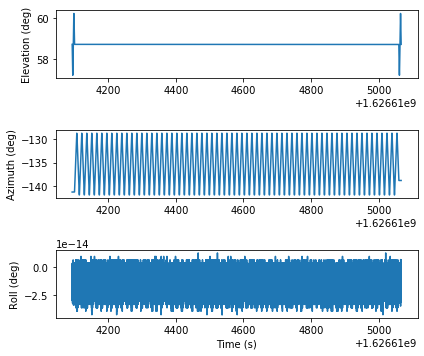

In [159]:
fig = plt.figure(figsize=(6,5))
plt.subplot(3,1,1)
plt.plot( tod.timestamps, np.degrees(tod.boresight.el) )
plt.ylabel('Elevation (deg)')
plt.subplot(3,1,2)

plt.plot( tod.timestamps, np.degrees(tod.boresight.az) )
plt.ylabel('Azimuth (deg)')
plt.subplot(3,1,3)

plt.plot( tod.timestamps, np.degrees(tod.boresight.roll) )
plt.ylabel('Roll (deg)') 
plt.xlabel('Time (s)')

fig.tight_layout()

# Hongbo: tod.timestamps time on x axis

In [160]:
tod.boresight.el
# ? bore.boresight

array([1.02503187, 1.02503133, 1.02502971, ..., 1.02504052, 1.02503674,
       1.02503403])

In [161]:
tod.timestamps

array([1.62661409e+09, 1.62661409e+09, 1.62661409e+09, ...,
       1.62661507e+09, 1.62661507e+09, 1.62661507e+09])

Manipulating AxisManagers

In [162]:
# Hongbo: np.diff for differences on the time axis
tsamp = np.median(np.diff(tod.timestamps))
# hb: // for floor division
n_cut = int(10//tsamp)
print('Trimming in time...')

tod.restrict('samps', (n_cut, tod.samps.count-n_cut))
print('The TOD now has {} samples'.format(tod.samps.count))

Trimming in time...
The TOD now has 209878 samples


wrap() and move()

In [163]:
sig_mean = np.mean( tod.signal, axis = 0)
tod.wrap('sig_mean', sig_mean, [(0,tod.samps)])

AxisManager(signal[dets,samps], timestamps[samps], boresight*[samps], qboresight_azel[samps,4], qboresight_radec[samps,4], site*[samps], flags*[dets,samps], focal_plane*[dets], sig_mean[samps], dets:LabelAxis(10), samps:OffsetAxis(209878))

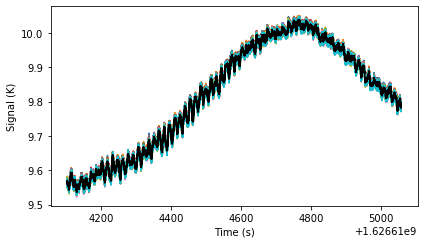

In [164]:
fig = plt.figure(figsize=(6,3.5))
# hb: this loop is for the 10 detectors' measurements
for i in range(tod.dets.count):
    plt.plot(tod.timestamps, tod.signal[i])
if hasattr(tod, 'sig_mean'):
    plt.plot(tod.timestamps, tod.sig_mean, 'k-')
plt.xlabel('Time (s)')
plt.ylabel('Signal (K)')
fig.tight_layout()

In [165]:
# hb: Look at ACTpol DataHow to understand the tod.signla?
tod.signal


array([[9.572829 , 9.568788 , 9.571813 , ..., 9.779796 , 9.787439 ,
        9.779038 ],
       [9.57332  , 9.569824 , 9.577244 , ..., 9.79687  , 9.786265 ,
        9.791448 ],
       [9.570009 , 9.5763035, 9.560692 , ..., 9.785355 , 9.783514 ,
        9.77744  ],
       ...,
       [9.567498 , 9.564495 , 9.566481 , ..., 9.784607 , 9.782862 ,
        9.781806 ],
       [9.561976 , 9.567677 , 9.572031 , ..., 9.786881 , 9.784866 ,
        9.777049 ],
       [9.56716  , 9.569625 , 9.562336 , ..., 9.7845125, 9.779762 ,
        9.785077 ]], dtype=float32)

Look at ACTpol Data

In [166]:
#context = core.Context('simons1_pipe_act_uranus.yaml')
context = core.Context(nersc_actpol)
obs_list = context.obsdb.get()
print("There are {} observations currently in the ACT database".format(len(obs_list)))

## Choose a random observation from the database
x = np.random.randint(len(obs_list))
my_obs = obs_list[x]

## Detector Sets are how the observation files are saved at the moment. 
det_sets = context.obsfiledb.get_detsets( my_obs['obs_id'] )
dets = context.obsfiledb.get_dets(det_sets[0])

### Just create a tod with 10 detectors
#act_tod = context.get_obs(my_obs)#, dets=dets[:10])

### Create a tod with just metadata and not the signal data
## This is so we can load all the detectors metadata without loading all the timestreams
act_tod = context.get_meta(my_obs['obs_id'])

print_tod_info(act_tod)

There are 45 observations currently in the ACT database
This TOD AxisManager has 2 Axes: 
	dets with 1255 entries
	samps with 217784 entries
This TOD  AxisManager has fields : [axes]
	glitch_flags : ['dets', 'samps']
	source_flags : ['dets', 'samps']
	relcal : ['dets']
	timeconst : ['dets']
	abscal : ['dets']
	focal_plane : ['dets']
		 act_x : ['dets']
		 act_y : ['dets']
		 act_pol : ['dets']
		 xi : ['dets']
		 eta : ['dets']
		 gamma : ['dets']
	pointofs : ['dets']
		 dx : ['dets']
		 dy : ['dets']
		 gamma : ['dets']


In [167]:
# hb: obs_list is a ResultSet object, (like a list)
print(obs_list[10]['timestamp'])
print(type(obs_list))
my_obs = obs_list[x]
# hb: my_obs, or say each element of obs_list is a OrderedDict object
print(type(my_obs))

1500022313.0
<class 'sotoddb.resultset.ResultSet'>
<class 'collections.OrderedDict'>


In [168]:
act_tod.focal_plane

AxisManager(act_x[dets], act_y[dets], act_pol[dets], xi[dets], eta[dets], gamma[dets], dets:LabelAxis(1255))

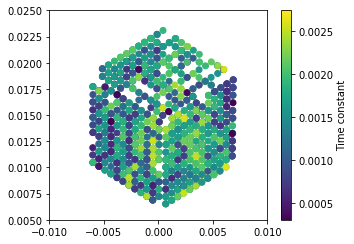

In [169]:
fig=plt.figure(figsize=(5,3.5))
# hb?: plt.scatter, how to understand this scatter plot?
# hb?: how to understand the focal plane?
# hb?: what is the timeconst?
plt.scatter(act_tod.focal_plane.act_x, act_tod.focal_plane.act_y,c=act_tod.timeconst)
cb = plt.colorbar()
cb.set_label('Time constant')
plt.xlim(-0.01,0.01)
plt.ylim(0.005,0.025);
fig.tight_layout()

In [170]:
#print(act_tod.timeconst)
print(type(act_tod.timeconst))
print(act_tod.timeconst.ndim)
print(act_tod.timeconst.size)

<class 'numpy.ndarray'>
1
1255


In [171]:
act_tod.focal_plane.act_y.size

1255

Flags and Timestream Operations

In [172]:
# hb?: what are flags?
# hb?: what is FlagManager?
# hb?: what is AxisManager? 
from sotodlib.core import FlagManager

import sotodlib.flags as flags
import sotodlib.sim_flags as sim_flags

import sotodlib.tod_ops.filters as filters

from sotodlib.tod_ops import fourier_filter, rfft, detrend_data

In [173]:
# hb?: what is Range and RangeMatix?
from so3g.proj import Ranges, RangesMatrix

In [174]:
t1_flag = Ranges(tod.samps.count, tod.samps.offset)
t1_flag.add_interval( 100,200)
print('T1: {}'.format(t1_flag.ranges()))
print('~T1: {}'.format((~t1_flag).ranges()))

t2_flag = Ranges(tod.samps.count, tod.samps.offset)
t2_flag.add_interval( 150,250)
print('T2: {}'.format(t2_flag.ranges()))

# hb?: the '+'  operataion and '*' operation
print('T1 + T2 = {}'.format( (t1_flag+t2_flag).ranges()))
print('T1 * T2 = {}'.format( (t1_flag*t2_flag).ranges()))

T1: [[100 200]]
~T1: [[     0    100]
 [   200 209878]]
T2: [[150 250]]
T1 + T2 = [[100 250]]
T1 * T2 = [[150 200]]


In [175]:
# hb: tod = context.get_obs(my_obs, dets=dets[:10])
type(tod)
# tod is a AxisManager object
type(tod.samps)
# tod.samps is an OffsetAxis
print(tod.samps.count)
print(tod.samps.offset)

209878
2200


In [176]:
type(t1_flag)

so3g.RangesInt32

Use Turn-around flags to get scan rate

In [177]:
flags.get_turnaround_flags(tod, merge=True, name='turnarounds');
print( tod.flags.turnarounds )

Ranges(n=209878:rngs=129)


In [178]:
tmsk = tod.flags.turnarounds.mask()
scan_rate = np.median( np.abs(np.diff(tod.boresight.az[~tmsk]))) / np.median(np.diff(tod.timestamps))
print( 'The scan rate is {} deg / s'.format(round(np.degrees(scan_rate),3) ))

turn = np.where( np.diff(tod.timestamps[tmsk]) > 0.005 )[0]
turn_time = np.median( np.diff(tod.timestamps[tmsk][turn]))
print('We turn around every {} s'.format(round(turn_time,3)))

The scan rate is 1.927 deg / s
We turn around every 7.405 s


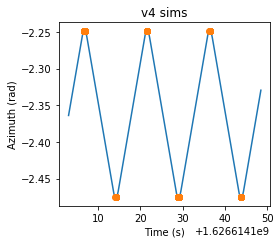

In [179]:
fig=plt.figure(figsize=(4,3.5))
nslice = 10000
plt.plot( tod.timestamps[:nslice], tod.boresight.az[:nslice])
plt.plot( tod.timestamps[:nslice][tmsk[:nslice]], tod.boresight.az[:nslice][tmsk[:nslice]], 'o')
plt.xlabel('Time (s)');
plt.ylabel('Azimuth (rad)')
plt.title('v4 sims')

fig.tight_layout()

Glitch / Jump Example

In [180]:
sim_flags.add_random_offsets(tod, verbose=True, signal='badness')
sim_flags.add_random_trends(tod, verbose=True, signal='badness', overwrite=False)
sim_flags.add_random_glitches(tod, verbose=True, signal='badness', overwrite=False)
sim_flags.add_random_jumps(tod, verbose=True, signal='badness', overwrite=False)

Adding Offsets to detectors
Adding Trends to Detectors
Adding 9 glitches to 6 detectors
Adding 2 jumps to 2 detectors


In [181]:
tod.badness

array([[ 3.74476018,  3.74476066,  3.74476115, ...,  3.84614907,
         3.84614956,  3.84615004],
       [-7.78355914, -7.78355857, -7.78355799, ..., -7.66294227,
        -7.66294169, -7.66294112],
       [ 1.02100024,  1.02100068,  1.02100112, ...,  1.11322479,
         1.11322523,  1.11322566],
       ...,
       [ 2.20420177,  2.20420217,  2.20420257, ...,  2.39112557,
         2.39112597,  2.39112637],
       [-8.3282173 , -8.32821682, -8.32821634, ..., -8.12636942,
        -8.12636894, -8.12636846],
       [-3.01380367, -3.01380322, -3.01380277, ..., -2.91943674,
        -2.9194363 , -2.91943585]])

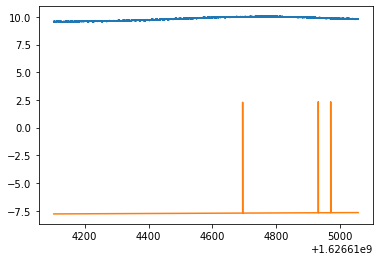

In [182]:
tod.signal[0]
plt.plot(tod.timestamps, tod.signal[1])
#plt.plot(tod.timestamps, tod.signal[2])
plt.plot(tod.timestamps, tod.badness[1])

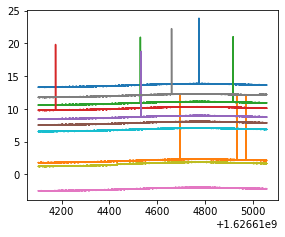

In [183]:
# hb: add tod.signal and tod.badness together
plt.figure(figsize=(4.5,3.5))
for i in range(tod.dets.count):
    plt.plot( tod.timestamps, tod.signal[i]+tod.badness[i] )
# hb: before adding badness, the tods are in the similar height, after adding badness, the height
# difference is very large. This is due to offsets?

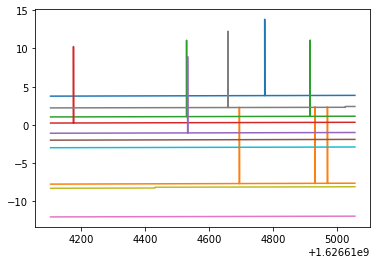

In [184]:
# hb: plot badness itself
for i in range(tod.dets.count):
    plt.plot( tod.timestamps, tod.badness[i] )

In [185]:
## if bad signal is already there, remove it
if 'bad_signal' in tod:
    tod.move('bad_signal', None)
    
## add the bad signal to the tod
tod.wrap('bad_signal', tod.signal+tod.badness, 
         [(0,tod.dets), (1,tod.samps)])

## basic edge detection method (borrowed from moby2). 
flags.get_glitch_flags(tod, signal='bad_signal', overwrite=True);

In [186]:
print('The Flag Manager currently contains {} set(s) of flags'.format(len(tod.flags._fields)))
for k in tod.flags._fields:
    print('\t{} : {}'.format(k, tod.flags._assignments[k]) ) 
    
print('The glitch detector flagged:\n{}'.format(tod.flags.glitches.get_stats()))

The Flag Manager currently contains 4 set(s) of flags
	turnarounds : ['samps']
	true_glitches : ['dets', 'samps']
	true_jumps : ['dets', 'samps']
	glitches : ['dets', 'samps']
The glitch detector flagged:
{'samples': [1149, 2789, 2033, 1209, 1165, 431, 416, 1605, 831, 431], 'intervals': [3, 5, 4, 3, 3, 2, 2, 4, 3, 2]}


In [187]:
sim_flags.add_random_glitches(tod, verbose=True, signal='badness', overwrite=False)

Adding 10 glitches to 6 detectors


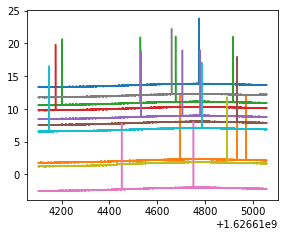

In [188]:
plt.figure(figsize=(4.5,3.5))
for i in range(tod.dets.count):
    plt.plot( tod.timestamps, tod.signal[i]+tod.badness[i] )

In [190]:
len(obs_list)

45

Back to nersc tod sims

In [208]:
test_context = core.Context(nersc_todsims)

In [219]:
test_obs_list = test_context.obsdb.get()
len(test_obs_list)
test_tod = io_load.load_file(fname)

In [220]:
# hb: input a height for the added glitches and then flags.get_glitch_flags
# let's have a new tod

# get test_obs from obs_list
test_obs = test_obs_list[138]
# get test_tod from test_obs
dets = context.obsfiledb.get_dets(det_sets[0])
test_tod = context.get_obs(test_obs, dets=dets[:10])

In [221]:
print("Observation: {}".format(test_obs['obs_id']))
for k in test_obs:
    if k == 'obs_id':
        continue
    print('\t', k,':', test_obs[k])

Observation: CES-Atacama-LAT-Tier1DEC-035..-045_RA+040..+050-21-0_MFF
	 timestamp : 1626614093.009091
	 drift : setting
	 az_min : -141.84857751648792
	 az_max : -128.821422483511
	 az_med : -135.4197826219584
	 el_min : 57.23000345371954
	 el_max : 60.22999654516515
	 el_med : 58.73
	 is_const_el : 0
	 is_const_az : 0
	 is_stare : 0


In [222]:
test_tod.signal

array([], shape=(0, 214278), dtype=float32)

In [223]:
plt.plot(test_tod.timestamps, test_tod.signal[2])

IndexError: index 2 is out of bounds for axis 0 with size 0

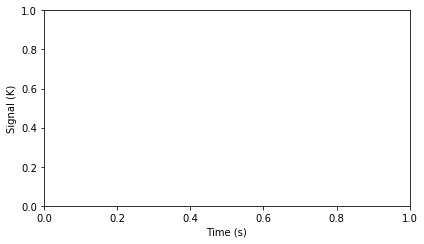

In [196]:
fig = plt.figure(figsize=(6,3.5))
for i in range(test_tod.dets.count):
    plt.plot(test_tod.timestamps, test_tod.signal[i])
plt.xlabel('Time (s)')
plt.ylabel('Signal (K)')
fig.tight_layout()